In [146]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [147]:
information = pd.read_csv('Car_Insurance_Claim.csv').head()
information = pd.DataFrame(information)
del information['Unnamed: 0']
information

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME        CREDIT_SCORE VEHICLE_OWNERSHIP VEHICLE_YEAR MARRIED  \
0    upper class   0.629027313918201               1.0   after 2015     0.0   
1        poverty  0.3577571170184627               0.0  before 2015     0.0   
2  working class  0.4931457852181982               1.0  before 2015     0.0   
3  working class  0.2060128507324556               1.0  before 2015     0.0   
4  working class  0.3883658881572184               1.0  before 2015     0.0   

  CHILDREN POSTAL_CODE ANNUAL_MILEAGE VEHICLE_TYPE SPEEDING_VIOLATIONS DUIS  \
0      1.0       10238        12000.0        sedan                   0    0   
1      0.0       10238        16000.0        sedan                   0    0   
2      0.0       10238        11000.0        sedan                   0    0   
3     none       32765        11000.0        sedan                   0    0   
4      0.0     32765.0        12000.0        sedan                   2    0   

  PAST_ACCIDENTS OUTCOME  
0              0     0.0  
1              0     1.0  
2              0     0.0  
3              0     0.0  
4              1     1.0

In [148]:
information['CHILDREN'] = information['CHILDREN'].replace('none', 0.0).astype(float)
information

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME        CREDIT_SCORE VEHICLE_OWNERSHIP VEHICLE_YEAR MARRIED  \
0    upper class   0.629027313918201               1.0   after 2015     0.0   
1        poverty  0.3577571170184627               0.0  before 2015     0.0   
2  working class  0.4931457852181982               1.0  before 2015     0.0   
3  working class  0.2060128507324556               1.0  before 2015     0.0   
4  working class  0.3883658881572184               1.0  before 2015     0.0   

   CHILDREN POSTAL_CODE ANNUAL_MILEAGE VEHICLE_TYPE SPEEDING_VIOLATIONS DUIS  \
0       1.0       10238        12000.0        sedan                   0    0   
1       0.0       10238        16000.0        sedan                   0    0   
2       0.0       10238        11000.0        sedan                   0    0   
3       0.0       32765        11000.0        sedan                   0    0   
4       0.0     32765.0        12000.0        sedan                   2    0   

  PAST_ACCIDENTS OUTCOME  
0              0     0.0  
1              0     1.0  
2              0     0.0  
3              0     0.0  
4              1     1.0

In [149]:
information ['EDUCATION'] = information['EDUCATION'].replace('none', np.nan)
information['CHILDREN'] = information['CHILDREN'].astype(float).astype(int)
information['VEHICLE_OWNERSHIP'] = information['VEHICLE_OWNERSHIP'].astype(float).astype(int)
information['POSTAL_CODE'] = information['POSTAL_CODE'].astype(float).astype(int)
information['MARRIED'] = information['MARRIED'].astype(float).astype(int)
information['OUTCOME'] = information['OUTCOME'].astype(float).astype(int)
information['ANNUAL_MILEAGE'] = information['ANNUAL_MILEAGE'].astype(float).astype(int)
information['CREDIT_SCORE'] = information['CREDIT_SCORE'].astype(float)
#information = information.sort_values(by='ID', ascending=False)
information = information.drop(columns=['DUIS'])
information = information.drop(columns=['MARRIED'])
information = information.drop(columns=['VEHICLE_TYPE'])
information = information.drop(columns=['RACE'])
information



ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0  569520    65+  female               0-9y  high school    upper class   
1  750365  16-25    male               0-9y          NaN        poverty   
2  199901  16-25  female               0-9y  high school  working class   
3  478866  16-25    male               0-9y   university  working class   
4  731664  26-39    male             10-19y          NaN  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  CHILDREN  POSTAL_CODE  \
0      0.629027                  1   after 2015         1        10238   
1      0.357757                  0  before 2015         0        10238   
2      0.493146                  1  before 2015         0        10238   
3      0.206013                  1  before 2015         0        32765   
4      0.388366                  1  before 2015         0        32765   

   ANNUAL_MILEAGE SPEEDING_VIOLATIONS PAST_ACCIDENTS  OUTCOME  
0           12000                   0              0        0  
1           16000                   0              0        1  
2           11000                   0              0        0  
3           11000                   0              0        0  
4           12000                   2              1        1

In [150]:
def age_group_to_number(age):
  
    min_age, max_age = map(int, age.split('-'))
    return (min_age + max_age) / 2

information.loc[0, 'AGE'] = '65-85' 
information
information['MEAN_AGE'] = information['AGE'].apply(age_group_to_number)
#information['MEAN_AGE'].mean()
information = information.rename(columns={'DRIVING_EXPERIENCE': 'DRIVING_EXPERIENCE_AGE'})

def driving_expiriece_age(expiriece_age):

    str_expiriece_age = expiriece_age.replace('y', ' ').strip()
    min_age, max_age = map(int, str_expiriece_age .split('-'))
    return (min_age + max_age) / 2
    
information['MEAN_DRIVING_EXPERIENCE_AGE'] = information['DRIVING_EXPERIENCE_AGE'].apply(driving_expiriece_age)    
information

ID    AGE  GENDER DRIVING_EXPERIENCE_AGE    EDUCATION         INCOME  \
0  569520  65-85  female                   0-9y  high school    upper class   
1  750365  16-25    male                   0-9y          NaN        poverty   
2  199901  16-25  female                   0-9y  high school  working class   
3  478866  16-25    male                   0-9y   university  working class   
4  731664  26-39    male                 10-19y          NaN  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  CHILDREN  POSTAL_CODE  \
0      0.629027                  1   after 2015         1        10238   
1      0.357757                  0  before 2015         0        10238   
2      0.493146                  1  before 2015         0        10238   
3      0.206013                  1  before 2015         0        32765   
4      0.388366                  1  before 2015         0        32765   

   ANNUAL_MILEAGE SPEEDING_VIOLATIONS PAST_ACCIDENTS  OUTCOME  MEAN_AGE  \
0           12000                   0              0        0      75.0   
1           16000                   0              0        1      20.5   
2           11000                   0              0        0      20.5   
3           11000                   0              0        0      20.5   
4           12000                   2              1        1      32.5   

   MEAN_DRIVING_EXPERIENCE_AGE  
0                          4.5  
1                          4.5  
2                          4.5  
3                          4.5  
4                         14.5

In [154]:
numeric_stats = information[['MEAN_AGE', 'ANNUAL_MILEAGE', 'CREDIT_SCORE', 'MEAN_DRIVING_EXPERIENCE_AGE']].agg(['mean', 'median', 'min', 'max'])
numeric_stats 

MEAN_AGE  ANNUAL_MILEAGE  CREDIT_SCORE  MEAN_DRIVING_EXPERIENCE_AGE
mean        33.8         12400.0      0.414862                          6.5
median      20.5         12000.0      0.388366                          4.5
min         20.5         11000.0      0.206013                          4.5
max         75.0         16000.0      0.629027                         14.5

In [180]:
profession_distribution = information['OUTCOME'].value_counts()
profession_distribution

OUTCOME
0    3
1    2
Name: count, dtype: int64

Text(0, 0.5, 'Mean Driving Experience Age')

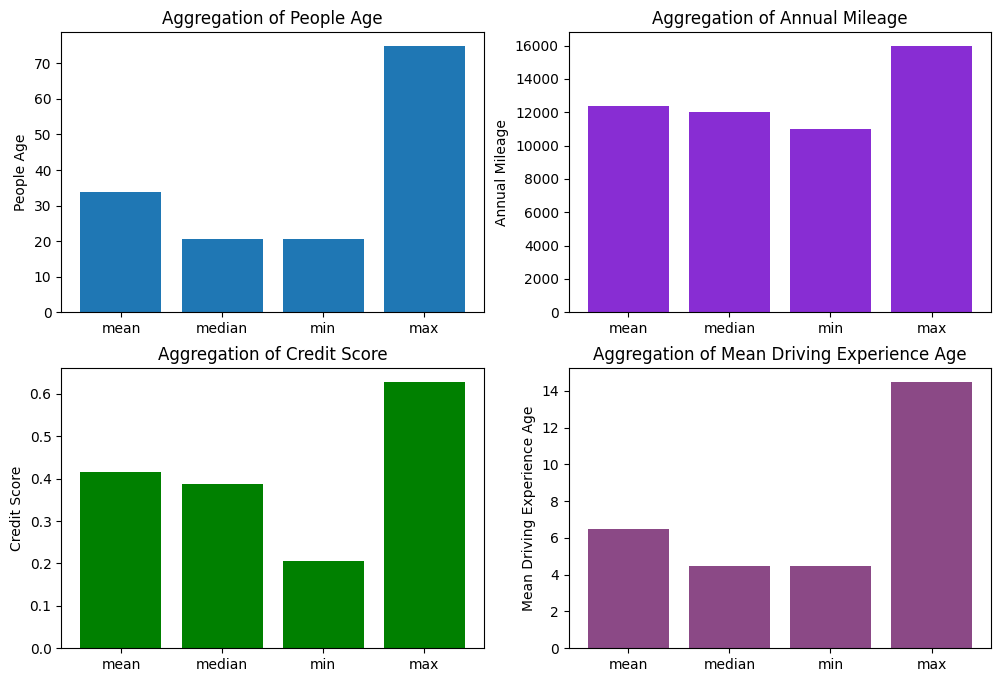

In [181]:
figure, xy = plt.subplots(2, 2, figsize=(12, 8))
xy[0, 0].bar(numeric_stats.index, numeric_stats['MEAN_AGE'])
xy[0, 0].set_title('Aggregation of People Age')
xy[0, 0].set_ylabel('People Age')

xy[0, 1].bar(numeric_stats.index, numeric_stats['ANNUAL_MILEAGE'], color=(136/255, 45/255, 211/255))
xy[0, 1].set_title('Aggregation of Annual Mileage')
xy[0, 1].set_ylabel('Annual Mileage')

xy[1, 0].bar(numeric_stats.index, numeric_stats['CREDIT_SCORE'], color='green')
xy[1, 0].set_title('Aggregation of Credit Score')
xy[1, 0].set_ylabel('Credit Score')

xy[1, 1].bar(numeric_stats.index, numeric_stats['MEAN_DRIVING_EXPERIENCE_AGE'], color = (139/255, 73/255, 134/255))
xy[1, 1].set_title('Aggregation of Mean Driving Experience Age')
xy[1, 1].set_ylabel('Mean Driving Experience Age')

MEAN_AGE  ANNUAL_MILEAGE  CREDIT_SCORE  \
MEAN_AGE                     1.000000        0.981283      0.896831   
ANNUAL_MILEAGE               0.981283        1.000000      0.955699   
CREDIT_SCORE                 0.896831        0.955699      1.000000   
MEAN_DRIVING_EXPERIENCE_AGE  0.998940        0.982325      0.891027   

                             MEAN_DRIVING_EXPERIENCE_AGE  
MEAN_AGE                                        0.998940  
ANNUAL_MILEAGE                                  0.982325  
CREDIT_SCORE                                    0.891027  
MEAN_DRIVING_EXPERIENCE_AGE                     1.000000

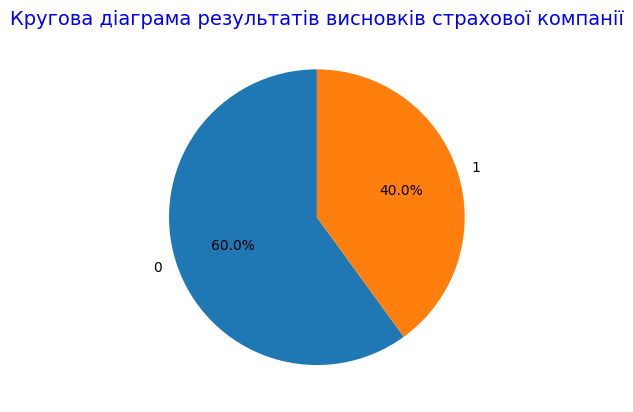

In [247]:
plt.pie(profession_distribution, labels=profession_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Кругова діаграма результатів висновків страхової компанії', fontsize=14, color='blue', loc='center')
plt.show()

In [191]:
correlation_matrix = numeric_stats .corr()
correlation_matrix = correlation_matrix.rename(index={'MEAN_AGE': 'M_A', 'ANNUAL_MILEAGE': 'A_M','CREDIT_SCORE': 'C_S', 'MEAN_DRIVING_EXPERIENCE_AGE': 'M_D_E_A'})

Text(0, 0.5, 'Mean Driving Experience Age')

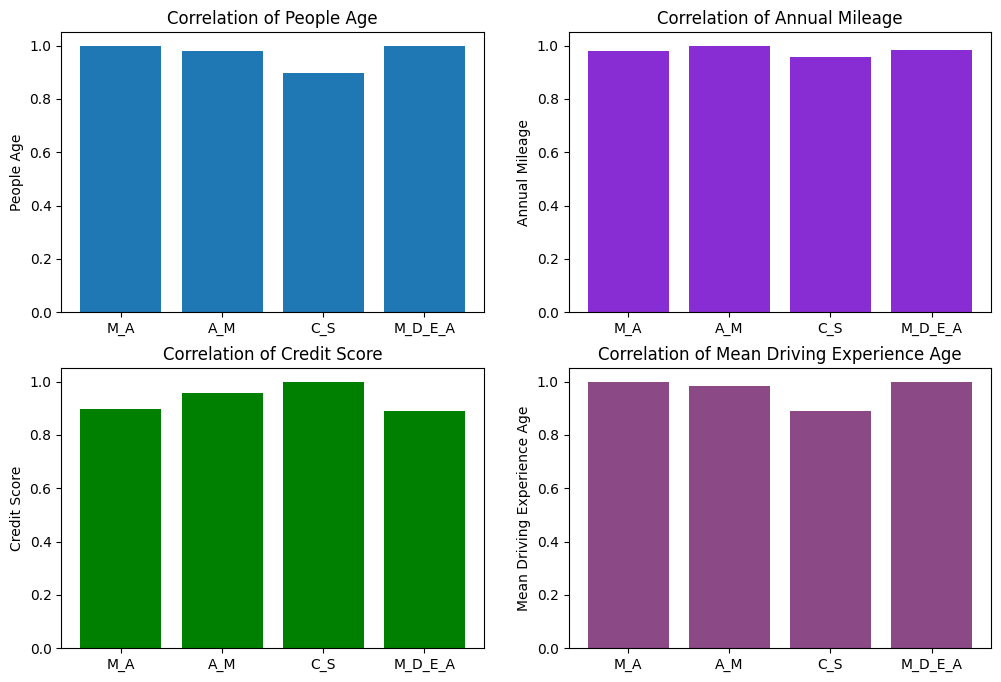

In [192]:
figure, xy = plt.subplots(2, 2, figsize=(12, 8))
xy[0, 0].bar(correlation_matrix.index, correlation_matrix['MEAN_AGE'])
xy[0, 0].set_title('Correlation of People Age')
xy[0, 0].set_ylabel('People Age')

xy[0, 1].bar(correlation_matrix.index, correlation_matrix['ANNUAL_MILEAGE'], color=(136/255, 45/255, 211/255))
xy[0, 1].set_title('Correlation of Annual Mileage')
xy[0, 1].set_ylabel('Annual Mileage')

xy[1, 0].bar(correlation_matrix.index, correlation_matrix['CREDIT_SCORE'], color='green')
xy[1, 0].set_title('Correlation of Credit Score')
xy[1, 0].set_ylabel('Credit Score')

xy[1, 1].bar(correlation_matrix.index, correlation_matrix['MEAN_DRIVING_EXPERIENCE_AGE'], color = (139/255, 73/255, 134/255))
xy[1, 1].set_title('Correlation of Mean Driving Experience Age')
xy[1, 1].set_ylabel('Mean Driving Experience Age')

In [209]:
information

ID    AGE  GENDER DRIVING_EXPERIENCE_AGE    EDUCATION         INCOME  \
0  569520  65-85  female                   0-9y  high school    upper class   
1  750365  16-25    male                   0-9y          NaN        poverty   
2  199901  16-25  female                   0-9y  high school  working class   
3  478866  16-25    male                   0-9y   university  working class   
4  731664  26-39    male                 10-19y          NaN  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  CHILDREN  POSTAL_CODE  \
0      0.629027                  1   after 2015         1        10238   
1      0.357757                  0  before 2015         0        10238   
2      0.493146                  1  before 2015         0        10238   
3      0.206013                  1  before 2015         0        32765   
4      0.388366                  1  before 2015         0        32765   

   ANNUAL_MILEAGE SPEEDING_VIOLATIONS PAST_ACCIDENTS  OUTCOME  MEAN_AGE  \
0           12000                   0              0        0      75.0   
1           16000                   0              0        1      20.5   
2           11000                   0              0        0      20.5   
3           11000                   0              0        0      20.5   
4           12000                   2              1        1      32.5   

   MEAN_DRIVING_EXPERIENCE_AGE  
0                          4.5  
1                          4.5  
2                          4.5  
3                          4.5  
4                         14.5

In [222]:
denied_claims = information[information['OUTCOME'] == 1]
approved_claims = information[information['OUTCOME'] == 0]
category_denied = denied_claims.groupby('GENDER').size()
category_approved = approved_claims.groupby('GENDER').size()


In [223]:
denied_claims

ID    AGE GENDER DRIVING_EXPERIENCE_AGE EDUCATION         INCOME  \
1  750365  16-25   male                   0-9y       NaN        poverty   
4  731664  26-39   male                 10-19y       NaN  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  CHILDREN  POSTAL_CODE  \
1      0.357757                  0  before 2015         0        10238   
4      0.388366                  1  before 2015         0        32765   

   ANNUAL_MILEAGE SPEEDING_VIOLATIONS PAST_ACCIDENTS  OUTCOME  MEAN_AGE  \
1           16000                   0              0        1      20.5   
4           12000                   2              1        1      32.5   

   MEAN_DRIVING_EXPERIENCE_AGE  
1                          4.5  
4                         14.5

In [224]:
approved_claims

ID    AGE  GENDER DRIVING_EXPERIENCE_AGE    EDUCATION         INCOME  \
0  569520  65-85  female                   0-9y  high school    upper class   
2  199901  16-25  female                   0-9y  high school  working class   
3  478866  16-25    male                   0-9y   university  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  CHILDREN  POSTAL_CODE  \
0      0.629027                  1   after 2015         1        10238   
2      0.493146                  1  before 2015         0        10238   
3      0.206013                  1  before 2015         0        32765   

   ANNUAL_MILEAGE SPEEDING_VIOLATIONS PAST_ACCIDENTS  OUTCOME  MEAN_AGE  \
0           12000                   0              0        0      75.0   
2           11000                   0              0        0      20.5   
3           11000                   0              0        0      20.5   

   MEAN_DRIVING_EXPERIENCE_AGE  
0                          4.5  
2                          4.5  
3                          4.5

In [246]:
denied_claims_people = information[information['OUTCOME'] == 0]

category_counts = denied_claims_people.groupby('GENDER').size()
category_driving_expiriece_counts = denied_claims_people.groupby('MEAN_DRIVING_EXPERIENCE_AGE').size()

most_denied_driving_expiriece = category_driving_expiriece_counts.idxmax()
most_denied_driving_expiriece_count = category_driving_expiriece_counts.max()
most_denied_category = category_counts.idxmax()
most_denied_count = category_counts.max()

print('-'*125)
print(f"Найбільше відмов отримали люди у гендер групі {most_denied_category} з стажем водіння {most_denied_driving_expiriece} в кількості {most_denied_count} відмов на таблицю.")
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Найбільше відмов отримали люди у гендер групі female з стажем водіння 4.5 в кількості 2 відмов на таблицю.
-----------------------------------------------------------------------------------------------------------------------------
